### Calculating and Plotting Ongoing Drawdown of S&P 500 Futures

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib widget

ticker = "ES=F"
dataset = yf.download(ticker)
sp500= pd.DataFrame(dataset)
sp500

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-09-18,1485.25,1489.75,1462.25,1467.50,1467.50,104794
2000-09-19,1467.00,1482.75,1466.75,1478.50,1478.50,103371
2000-09-20,1478.75,1480.50,1450.25,1469.50,1469.50,109667
2000-09-21,1470.25,1474.00,1455.50,1469.50,1469.50,98528
2000-09-22,1454.75,1471.00,1436.75,1468.50,1468.50,97416
...,...,...,...,...,...,...
2024-01-22,4872.50,4898.25,4872.50,4881.00,4881.00,1356050
2024-01-23,4881.75,4902.00,4874.25,4895.00,4895.00,1130749
2024-01-24,4900.25,4933.25,4889.00,4898.00,4898.00,1586824


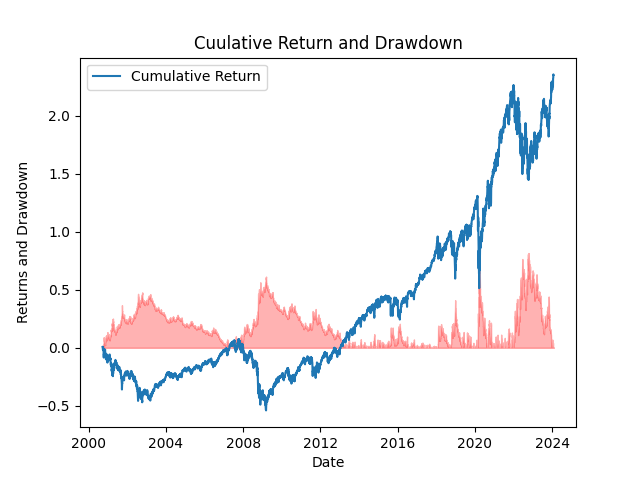

In [4]:
sp500['log_return'] = np.log(sp500["Adj Close"]).diff()
sp500['log_return'] = sp500.log_return.dropna()
sp500['cumulative_return'] = np.exp(np.cumsum(sp500['log_return'])) - 1

rolling_max = sp500['cumulative_return'].cummax()
sp500['drawdown'] = rolling_max - sp500['cumulative_return']


fig, ax = plt.subplots()
ax.fill_between(sp500.index, sp500['drawdown'], color = "red", alpha = 0.3)
ax.plot(sp500['cumulative_return'], label = "Cumulative Return")
ax.set_title("Cuulative Return and Drawdown")
ax.set_xlabel("Date")
ax.set_ylabel("Returns and Drawdown")
ax.legend()
plt.show()